# Frequency-domain filtering using a Butterworth filter

Frequency-domain noise can be removed by a combination of frequency filters. A low-pass filter can remove high frequency components while letting through low frequency components. A high pass filter does the reverse and lets high frequency components through while removing low frequency components. A notch filter removes a specific frequency from the signal. 

We are now going to use a filter called a 'butterworth filter' to remove noise. A Butterworth filter is a popular frequency domain 'lowpass' filter that can remove high frequency noise while only letting the low frequencies through. Since the walking signal is low frequency (only a few steps minute), this is a good approach.

Filters in this class are specified by two parameters, the cutoff frequency and the filter order. The figure below shows a butterworth filter with a cutoff frequency of one (this can be scaled to other frequencies). The order of the filter determines the rolloff -- if the order is low (e.g. n=1), the rolloff is gradual i.e. the cutoff is not sharp, and if the order is large (e.g. n=6), the rolloff is steep. While a sharper filter seems like the better choise, these require more computation resources (if filtering is done digitally) and more hardware complexity (if filtering is done in analog hardware). So, the order is chosen to be the minimum necessary for the problem at hand.

<img src="figures/butterworth.gif" width=350>

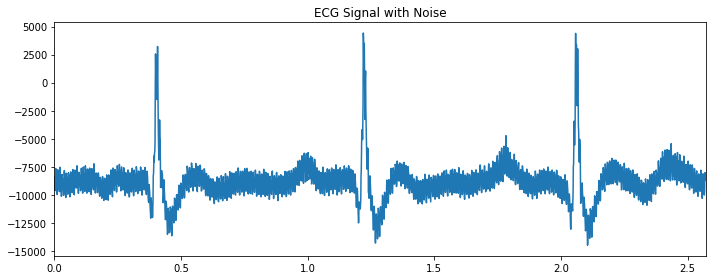

In [1]:
import scipy.io.wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

# read ECG data from the WAV file (courtesy Scott W Harden)
sampleRate, data = scipy.io.wavfile.read('data/ECG-Trace/ecg.wav')
times = np.arange(len(data))/sampleRate

# plot the original ecg data
plt.figure(figsize=(10, 4))
plt.plot(times, data)
plt.title("ECG Signal with Noise")
plt.margins(0, .05)
plt.tight_layout()
plt.show()


In [2]:
# Design lowpass filter.
# Args:
#     - cutoff (float) : the cutoff frequency of the filter.
#     - fs     (float) : the sampling rate.
#     - order    (int) : order of the filter, by default defined to 5.

# set sample rate to 1kHz
sampling_rate = 1000

# calculate the Nyquist frequency
nyq = 0.5 * sampling_rate

# set order of the filter
order = 3

# set cutoff frequency for lowpass filter
cutoff = 50 #Hz

# design filter
low = cutoff / nyq
b, a = scipy.signal.butter(order, low, btype='low')

# apply the lowpass filter to the data
filtered = scipy.signal.filtfilt(b, a, data)


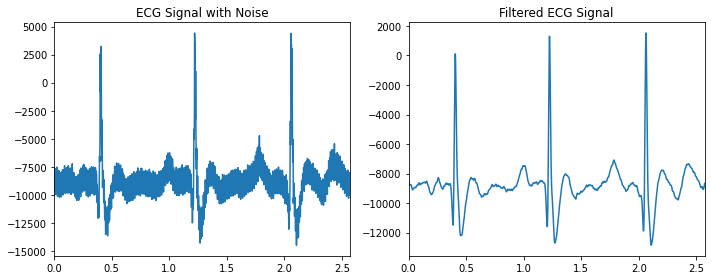

In [3]:
# plot the original data next to the filtered data

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(times, data)
plt.title("ECG Signal with Noise")
plt.margins(0, .05)

plt.subplot(122)
plt.plot(times, filtered)
plt.title("Filtered ECG Signal")
plt.margins(0, .05)

plt.tight_layout()
plt.show()


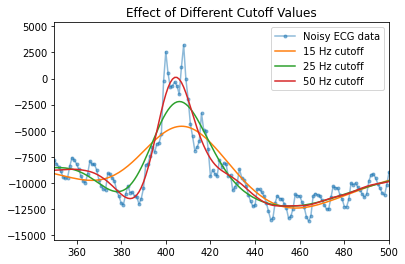

In [4]:
plt.plot(data, '.-', alpha=.5, label="Noisy ECG data")

for cutoff in [.03, .05, .1]:
    b, a = scipy.signal.butter(order, cutoff)
    filtered = scipy.signal.filtfilt(b, a, data)
    label = f"{int(cutoff*nyq):d} Hz cutoff"
    plt.plot(filtered, label=label)

plt.legend()
plt.axis([350, 500, None, None])
plt.title("Effect of Different Cutoff Values")
plt.show()


In [5]:
b, a = scipy.signal.butter(order, 0.05, 'lowpass')
filteredLowPass = scipy.signal.filtfilt(b, a, data)

b, a = scipy.signal.butter(order, 0.05, 'highpass')
filteredHighPass = scipy.signal.filtfilt(b, a, data)

b, a = scipy.signal.butter(order, [.01, .05], 'band')
filteredBandPass = scipy.signal.lfilter(b, a, data)


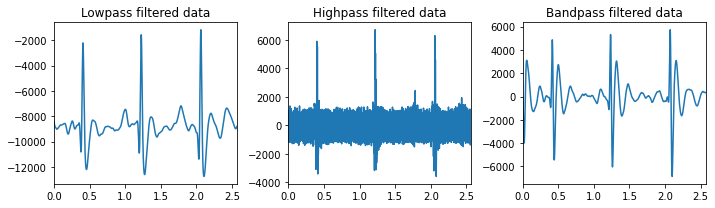

In [6]:
# plot the original data next to the filtered data

plt.figure(figsize=(10, 3))

plt.subplot(131)
plt.plot(times, filteredLowPass)
plt.title("Lowpass filtered data")
plt.margins(0, .05)

plt.subplot(132)
plt.plot(times, filteredHighPass)
plt.title("Highpass filtered data")
plt.margins(0, .05)

plt.subplot(133)
plt.plot(times, filteredBandPass)
plt.title("Bandpass filtered data")
plt.margins(0, .05)

plt.tight_layout()
plt.show()
